# Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

from importlib import reload
import utils  # Importa el módulo
reload(utils)  # Recarga el módulo

<module 'utils' from 'c:\\Users\\USUARIO\\OneDrive - Universidad de Antioquia\\Aprendizaje\\Universidad\\2023-2\\Analítica II\\Caso Estudio Supervisado\\pediccion_abandono_empleo\\utils.py'>

# Importar datos

In [2]:
df_anova = pd.read_csv('Datasets/seleccion_anova.csv')
df_manual = pd.read_csv('Datasets/seleccion_manual.csv')
df_total = pd.read_csv('Datasets/datos_preparados.csv')

#### Separar variable objetivo y hacer el split

In [3]:
X_anova = df_anova
y = df_total.target
X_manual= df_manual

X_train, X_test, y_train, y_test = utils.split(X_manual, y, test_size = 0.2)
X_train_a, X_test_a, y_train_a, y_test_a = utils.split(X_anova, y, test_size = 0.2)

X train shape:  (3520, 45)
y train shape:  (881, 45)
X test shape:  (3520,)
y test shape:  (881,)
X train shape:  (3520, 30)
y train shape:  (881, 30)
X test shape:  (3520,)
y test shape:  (881,)


# Importar modelos

In [4]:
# Cargar el modelo desde la carpeta Modelos
xgb_manual = joblib.load('Modelos/xgb_opt.pkl')
xgb_anova = joblib.load('Modelos/xgb_opt_anova.pkl')

# Xtreme Gradian Boosting Classifier con selección manual

------------------------------ MANUAL ------------------------------


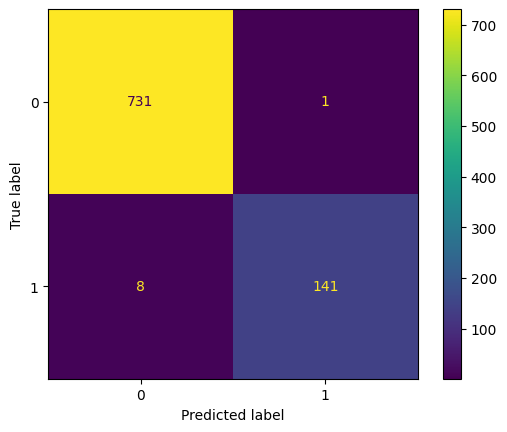

Precision: 0.9929577464788732
Recall: 0.9463087248322147
Especificidad: 0.9986338797814208
F1 score: 0.9690721649484537
Train score:  0.9897843359818388


In [5]:
precision, recall, especificidad, f1_score = utils.metricas(xgb_manual, X_test, y_test, 'MANUAL')

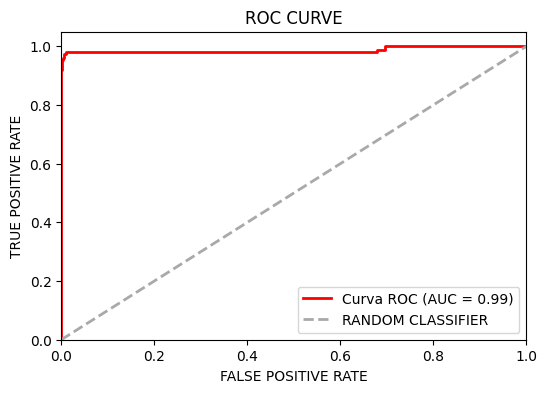

0.9858895368027286

In [6]:
utils.curvaROC(xgb_manual,X_test,y_test)

# Xtreme Gradian Boosting Classifier con Selección Anova

------------------------------ ANOVA ------------------------------


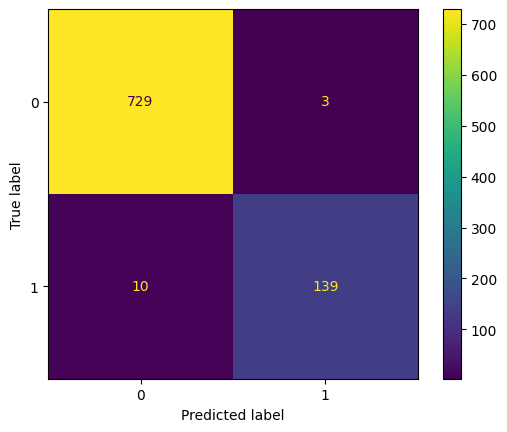

Precision: 0.9788732394366197
Recall: 0.9328859060402684
Especificidad: 0.9959016393442623
F1 score: 0.9553264604810996
Train score:  0.985244040862656


In [7]:
precision, recall, especificidad, f1_score = utils.metricas(xgb_anova, X_test_a, y_test_a, 'ANOVA')

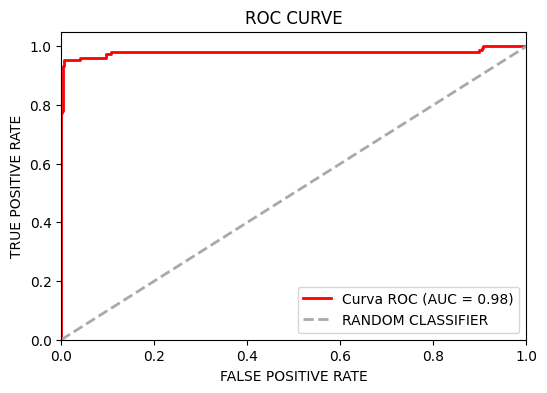

0.9789214068287673

In [8]:
utils.curvaROC(xgb_anova,X_test_a,y_test_a)